In [1]:
import os,glob
import pandas as pd
%pylab
%matplotlib inline

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import torch
from torch.utils.data import Dataset

In [3]:
def pca(data):
    from sklearn.decomposition import PCA
    pca = PCA()
    pca.fit(data)
    X_pca = pca.transform(data)
    return X_pca

In [4]:
cpu_datasets=glob.glob('cpu_dataset/*pkl')
cpu_datasets

['cpu_dataset/result1.pkl',
 'cpu_dataset/result3.pkl',
 'cpu_dataset/result2.pkl']

In [5]:
cpu_dataset=pd.concat([pd.read_pickle(i,compression='gzip') for i in cpu_datasets])
cpu_dataset.reset_index(drop=True,inplace=True)
cpu_dataset


,names,knobs,tasks,weights,strides,paddings,indexs,targets,networks,shots,vectors,cost
0,topi_x86_conv2d_NCHWc,tile_ic-tile_oc-tile_ow-unroll_kw,"Task(func_name=topi_x86_conv2d_NCHWc, args=(('...","[64, 3, 7, 7]","[2, 2]","[3, 3, 3, 3]",121,llvm -mcpu=core-avx2,resnet-18,1000,"[0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 3.0, 0.0, ...",0.017463
1,topi_x86_conv2d_NCHWc,tile_ic-tile_oc-tile_ow-unroll_kw,"Task(func_name=topi_x86_conv2d_NCHWc, args=(('...","[64, 3, 7, 7]","[2, 2]","[3, 3, 3, 3]",100,llvm -mcpu=core-avx2,resnet-18,1000,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, ...",0.017456
2,topi_x86_conv2d_NCHWc,tile_ic-tile_oc-tile_ow-unroll_kw,"Task(func_name=topi_x86_conv2d_NCHWc, args=(('...","[64, 3, 7, 7]","[2, 2]","[3, 3, 3, 3]",34,llvm -mcpu=core-avx2,resnet-18,1000,"[0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, ...",0.017457
3,topi_x86_conv2d_NCHWc,tile_ic-tile_oc-tile_ow-unroll_kw,"Task(func_name=topi_x86_conv2d_NCHWc, args=(('...","[64, 3, 7, 7]","[2, 2]","[3, 3, 3, 3]",111,llvm -mcpu=core-avx2,resnet-18,1000,"[0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 3.0, 0.0, ...",0.017455
4,topi_x86_conv2d_NCHWc,tile_ic-tile_oc-tile_ow-unroll_kw,"Task(func_name=topi_x86_conv2d_NCHWc, args=(('...","[64, 3, 7, 7]","[2, 2]","[3, 3, 3, 3]",46,llvm -mcpu=core-avx2,resnet-18,1000,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.017462
...,...,...,...,...,...,...,...,...,...,...,...,...
34197,topi_x86_conv2d_NCHWc,tile_ic-tile_oc-tile_ow-unroll_kw,"Task(func_name=topi_x86_conv2d_NCHWc, args=(('...","[64, 3, 3, 3]","[1, 1]","[1, 1, 1, 1]",168,llvm -mcpu=core-avx2,vgg-16,2000,"[0.0, 0.0, 0.0, 1.0, 26.369596481323242, 0.0, ...",0.005720
34198,topi_x86_conv2d_NCHWc,tile_ic-tile_oc-tile_ow-unroll_kw,"Task(func_name=topi_x86_conv2d_NCHWc, args=(('...","[64, 3, 3, 3]","[1, 1]","[1, 1, 1, 1]",191,llvm -mcpu=core-avx2,vgg-16,2000,"[0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 3.0, 0.0, ...",0.005713
34199,topi_x86_conv2d_NCHWc,tile_ic-tile_oc-tile_ow-unroll_kw,"Task(func_name=topi_x86_conv2d_NCHWc, args=(('...","[64, 3, 3, 3]","[1, 1]","[1, 1, 1, 1]",27,llvm -mcpu=core-avx2,vgg-16,2000,"[0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 3.0, 0.0, ...",0.005721
34200,topi_x86_conv2d_NCHWc,tile_ic-tile_oc-tile_ow-unroll_kw,"Task(func_name=topi_x86_conv2d_NCHWc, args=(('...","[64, 3, 3, 3]","[1, 1]","[1, 1, 1, 1]",103,llvm -mcpu=core-avx2,vgg-16,2000,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.005718


In [6]:
gpu_datasets=glob.glob('gpu_dataset/*.pkl')
gpu_datasets

['gpu_dataset/result1.pkl',
 'gpu_dataset/result5.pkl',
 'gpu_dataset/result6.pkl',
 'gpu_dataset/result3.pkl',
 'gpu_dataset/result2.pkl',
 'gpu_dataset/result8.pkl',
 'gpu_dataset/result4.pkl',
 'gpu_dataset/result7.pkl']

In [7]:
gpu_dataset=pd.concat([pd.read_pickle(i,compression='gzip') for i in gpu_datasets])
gpu_dataset.reset_index(drop=True,inplace=True)
gpu_dataset


,names,knobs,tasks,weights,strides,paddings,indexs,targets,networks,shots,vectors,cost
0,topi_nn_conv2d,tile_f-tile_y-tile_x-tile_rc-tile_ry-tile_rx-a...,"Task(func_name=topi_nn_conv2d, args=(('TENSOR'...","[64, 3, 7, 7]","[2, 2]","[3, 3, 3, 3]",46689844,cuda -model=unknown,resnet-18,1000,"[0.0, 0.0, 0.0, 0.0, 26.814382553100586, 0.0, ...",0.017262
1,topi_nn_conv2d,tile_f-tile_y-tile_x-tile_rc-tile_ry-tile_rx-a...,"Task(func_name=topi_nn_conv2d, args=(('TENSOR'...","[64, 3, 7, 7]","[2, 2]","[3, 3, 3, 3]",70890288,cuda -model=unknown,resnet-18,1000,"[28.814382553100586, 0.0, 28.814382553100586, ...",0.017294
2,topi_nn_conv2d,tile_f-tile_y-tile_x-tile_rc-tile_ry-tile_rx-a...,"Task(func_name=topi_nn_conv2d, args=(('TENSOR'...","[64, 3, 7, 7]","[2, 2]","[3, 3, 3, 3]",8150029,cuda -model=unknown,resnet-18,1000,"[0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 3.0, 0.0, ...",0.017294
3,topi_nn_conv2d,tile_f-tile_y-tile_x-tile_rc-tile_ry-tile_rx-a...,"Task(func_name=topi_nn_conv2d, args=(('TENSOR'...","[64, 3, 7, 7]","[2, 2]","[3, 3, 3, 3]",14056315,cuda -model=unknown,resnet-18,1000,"[0.0, 0.0, 0.0, 1.0, 26.814382553100586, 0.0, ...",0.017275
4,topi_nn_conv2d,tile_f-tile_y-tile_x-tile_rc-tile_ry-tile_rx-a...,"Task(func_name=topi_nn_conv2d, args=(('TENSOR'...","[64, 3, 7, 7]","[2, 2]","[3, 3, 3, 3]",32113680,cuda -model=unknown,resnet-18,1000,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, ...",0.017303
...,...,...,...,...,...,...,...,...,...,...,...,...
123082,topi_nn_conv2d,tile_f-tile_y-tile_x-tile_rc-tile_ry-tile_rx-a...,"Task(func_name=topi_nn_conv2d, args=(('TENSOR'...","[1024, 1024, 1, 1]","[1, 1]","[0, 0, 0, 0]",114126,cuda -model=unknown,mobilenet,7018,"[0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.19264507...",0.015171
123083,topi_nn_conv2d,tile_f-tile_y-tile_x-tile_rc-tile_ry-tile_rx-a...,"Task(func_name=topi_nn_conv2d, args=(('TENSOR'...","[1024, 1024, 1, 1]","[1, 1]","[0, 0, 0, 0]",259708,cuda -model=unknown,mobilenet,7018,"[0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 24.807353973388...",0.015175
123084,topi_nn_conv2d,tile_f-tile_y-tile_x-tile_rc-tile_ry-tile_rx-a...,"Task(func_name=topi_nn_conv2d, args=(('TENSOR'...","[1024, 1024, 1, 1]","[1, 1]","[0, 0, 0, 0]",183709,cuda -model=unknown,mobilenet,7018,"[0.0, 0.0, 26.614709854125977, 0.0, 26.6147098...",0.015173
123085,topi_nn_conv2d,tile_f-tile_y-tile_x-tile_rc-tile_ry-tile_rx-a...,"Task(func_name=topi_nn_conv2d, args=(('TENSOR'...","[1024, 1024, 1, 1]","[1, 1]","[0, 0, 0, 0]",26262,cuda -model=unknown,mobilenet,7018,"[0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.19264507...",0.015172


In [8]:
num=0
_dataset=[]
for idx,value in cpu_dataset.groupby(['shots']):
    value['idx']=num
    value['len']=value['vectors'].map(lambda x: len(x))
    _dataset.append(value[['idx','vectors','cost','len']].values)
    num+=1
dataset=np.concatenate(_dataset)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
selected_dataset=dataset[np.isin(dataset[:,0],rand)]

In [29]:
train_data=[]
train_labels=[]
test_data=[]
test_labels=[]

In [30]:
# ways=np.random.default_rng().choice(_max+1, size=5, replace=False)
len_vector=random.choice(dataset[:,3])
# cpu 는 vector의 길이가 [321, 480, 481] 이며 각각 [21351,  2321, 10530] 개 있음 
# uniform dis에서 길이 제한을 선택
selected_dataset=dataset[dataset[:,3]==len_vector]
# 위에서 선택한 백터 길이을 이용하려 dataset을 필터링
ways=np.random.default_rng().choice(np.unique(selected_dataset[:,0]), size=5, replace=False)
# 위 필터링된 데이터가 존재하는 idx를 unique로 뽑고(특정 idx에서는 하나 또는 두개의 len 만 
# 존재하는 경우가 있음 그것을 way size 만큼 뽑는다.

for way in ways:
    idx=np.random.choice(np.where(selected_dataset[:,0]==way)[0],5)
    # np.where로 way에 해당하는 selected data array idx 반환 5개 추출
    # N-shot 을 진행할 idx 추출
    train_data.append(np.array(np.vstack(selected_dataset[idx][:,1])))
    train_labels.append(selected_dataset[idx][:,2])
    


In [12]:
train_data=np.vstack(train_data)
train_labels=np.vstack(train_labels)

In [24]:
print(train_labels.shape,train_data.shape)


AttributeError: 'list' object has no attribute 'shape'

In [32]:
np.concatenate(train_labels).shape

(25,)

In [20]:
selected_dataset[idx][:,2]

array([0.0005512772876712328, 0.004247733722222222, 0.0005463636666666667,
       0.0007265665915915916, 0.004245698277777777], dtype=object)

In [14]:
train_data[0].shape

(321,)

In [15]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
pca1 = PCA()
temp=pca1.fit_transform(normalize(train_data))
temp.shape
#X_pca = pca1.transform(data)
    

(25, 25)

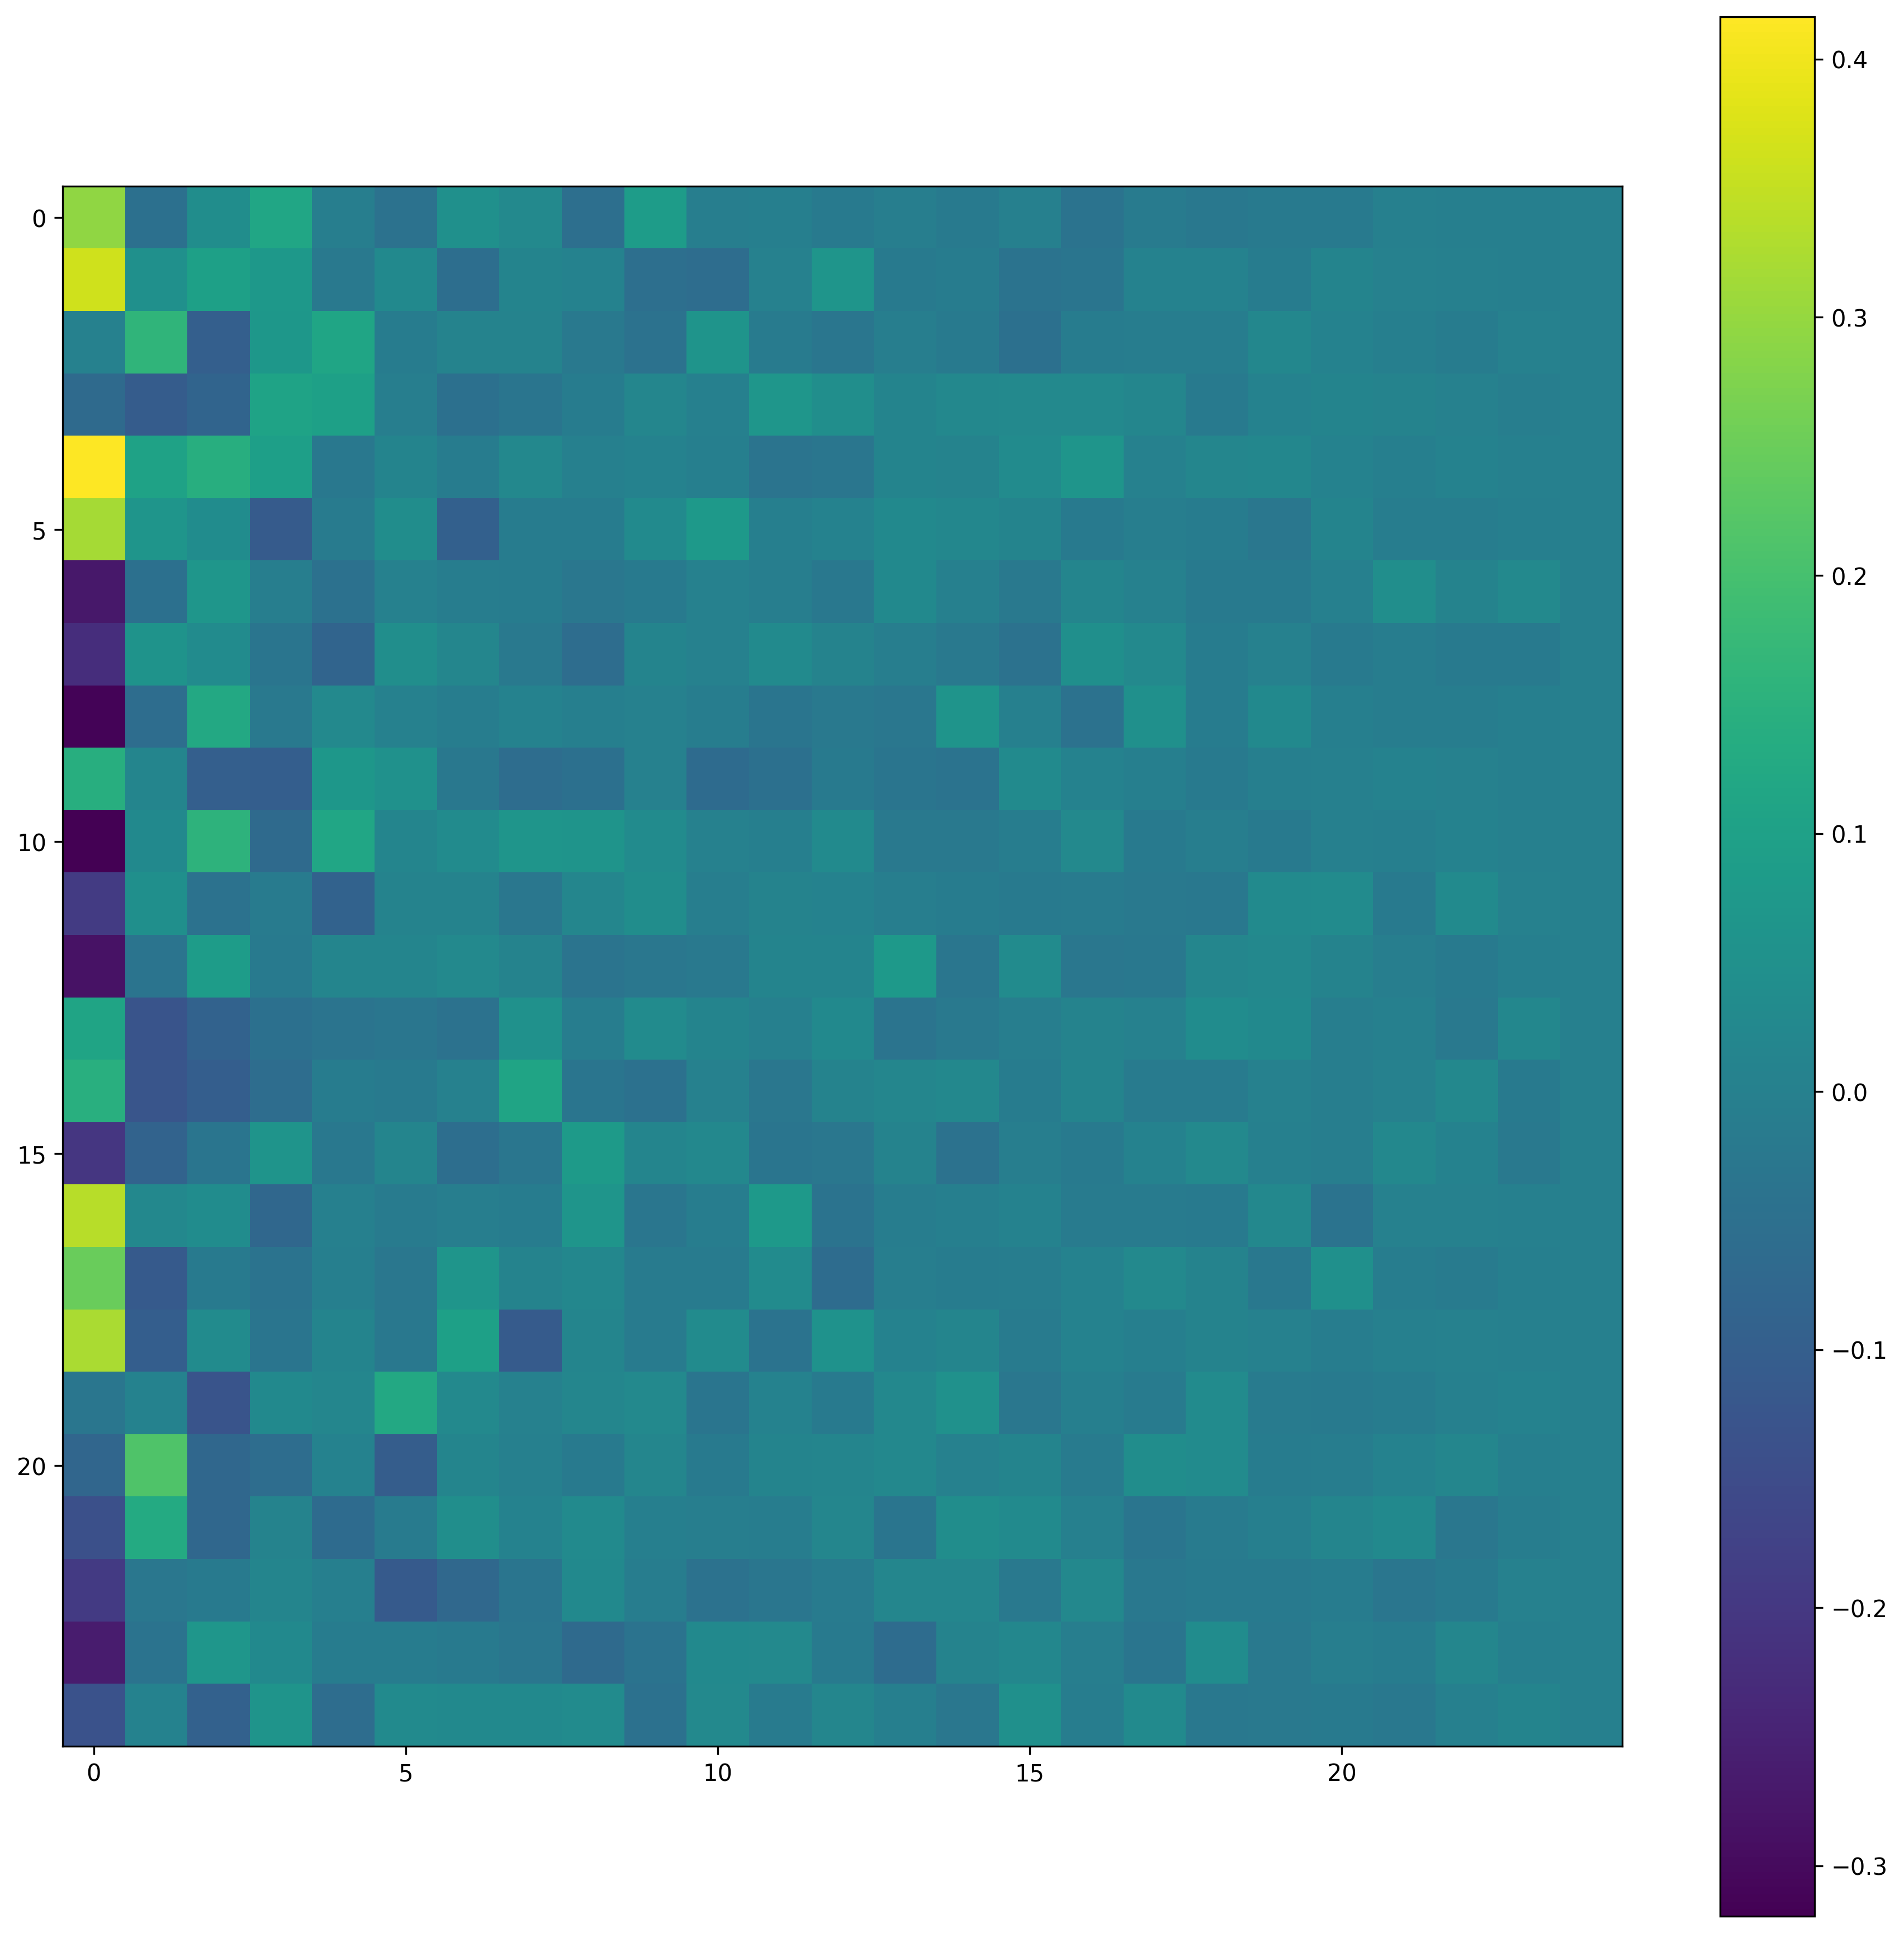

In [16]:
figure(num=None, figsize=(15, 15), dpi=300, facecolor='w', edgecolor='k')
plt.imshow(temp)
plt.colorbar()
plt.show()

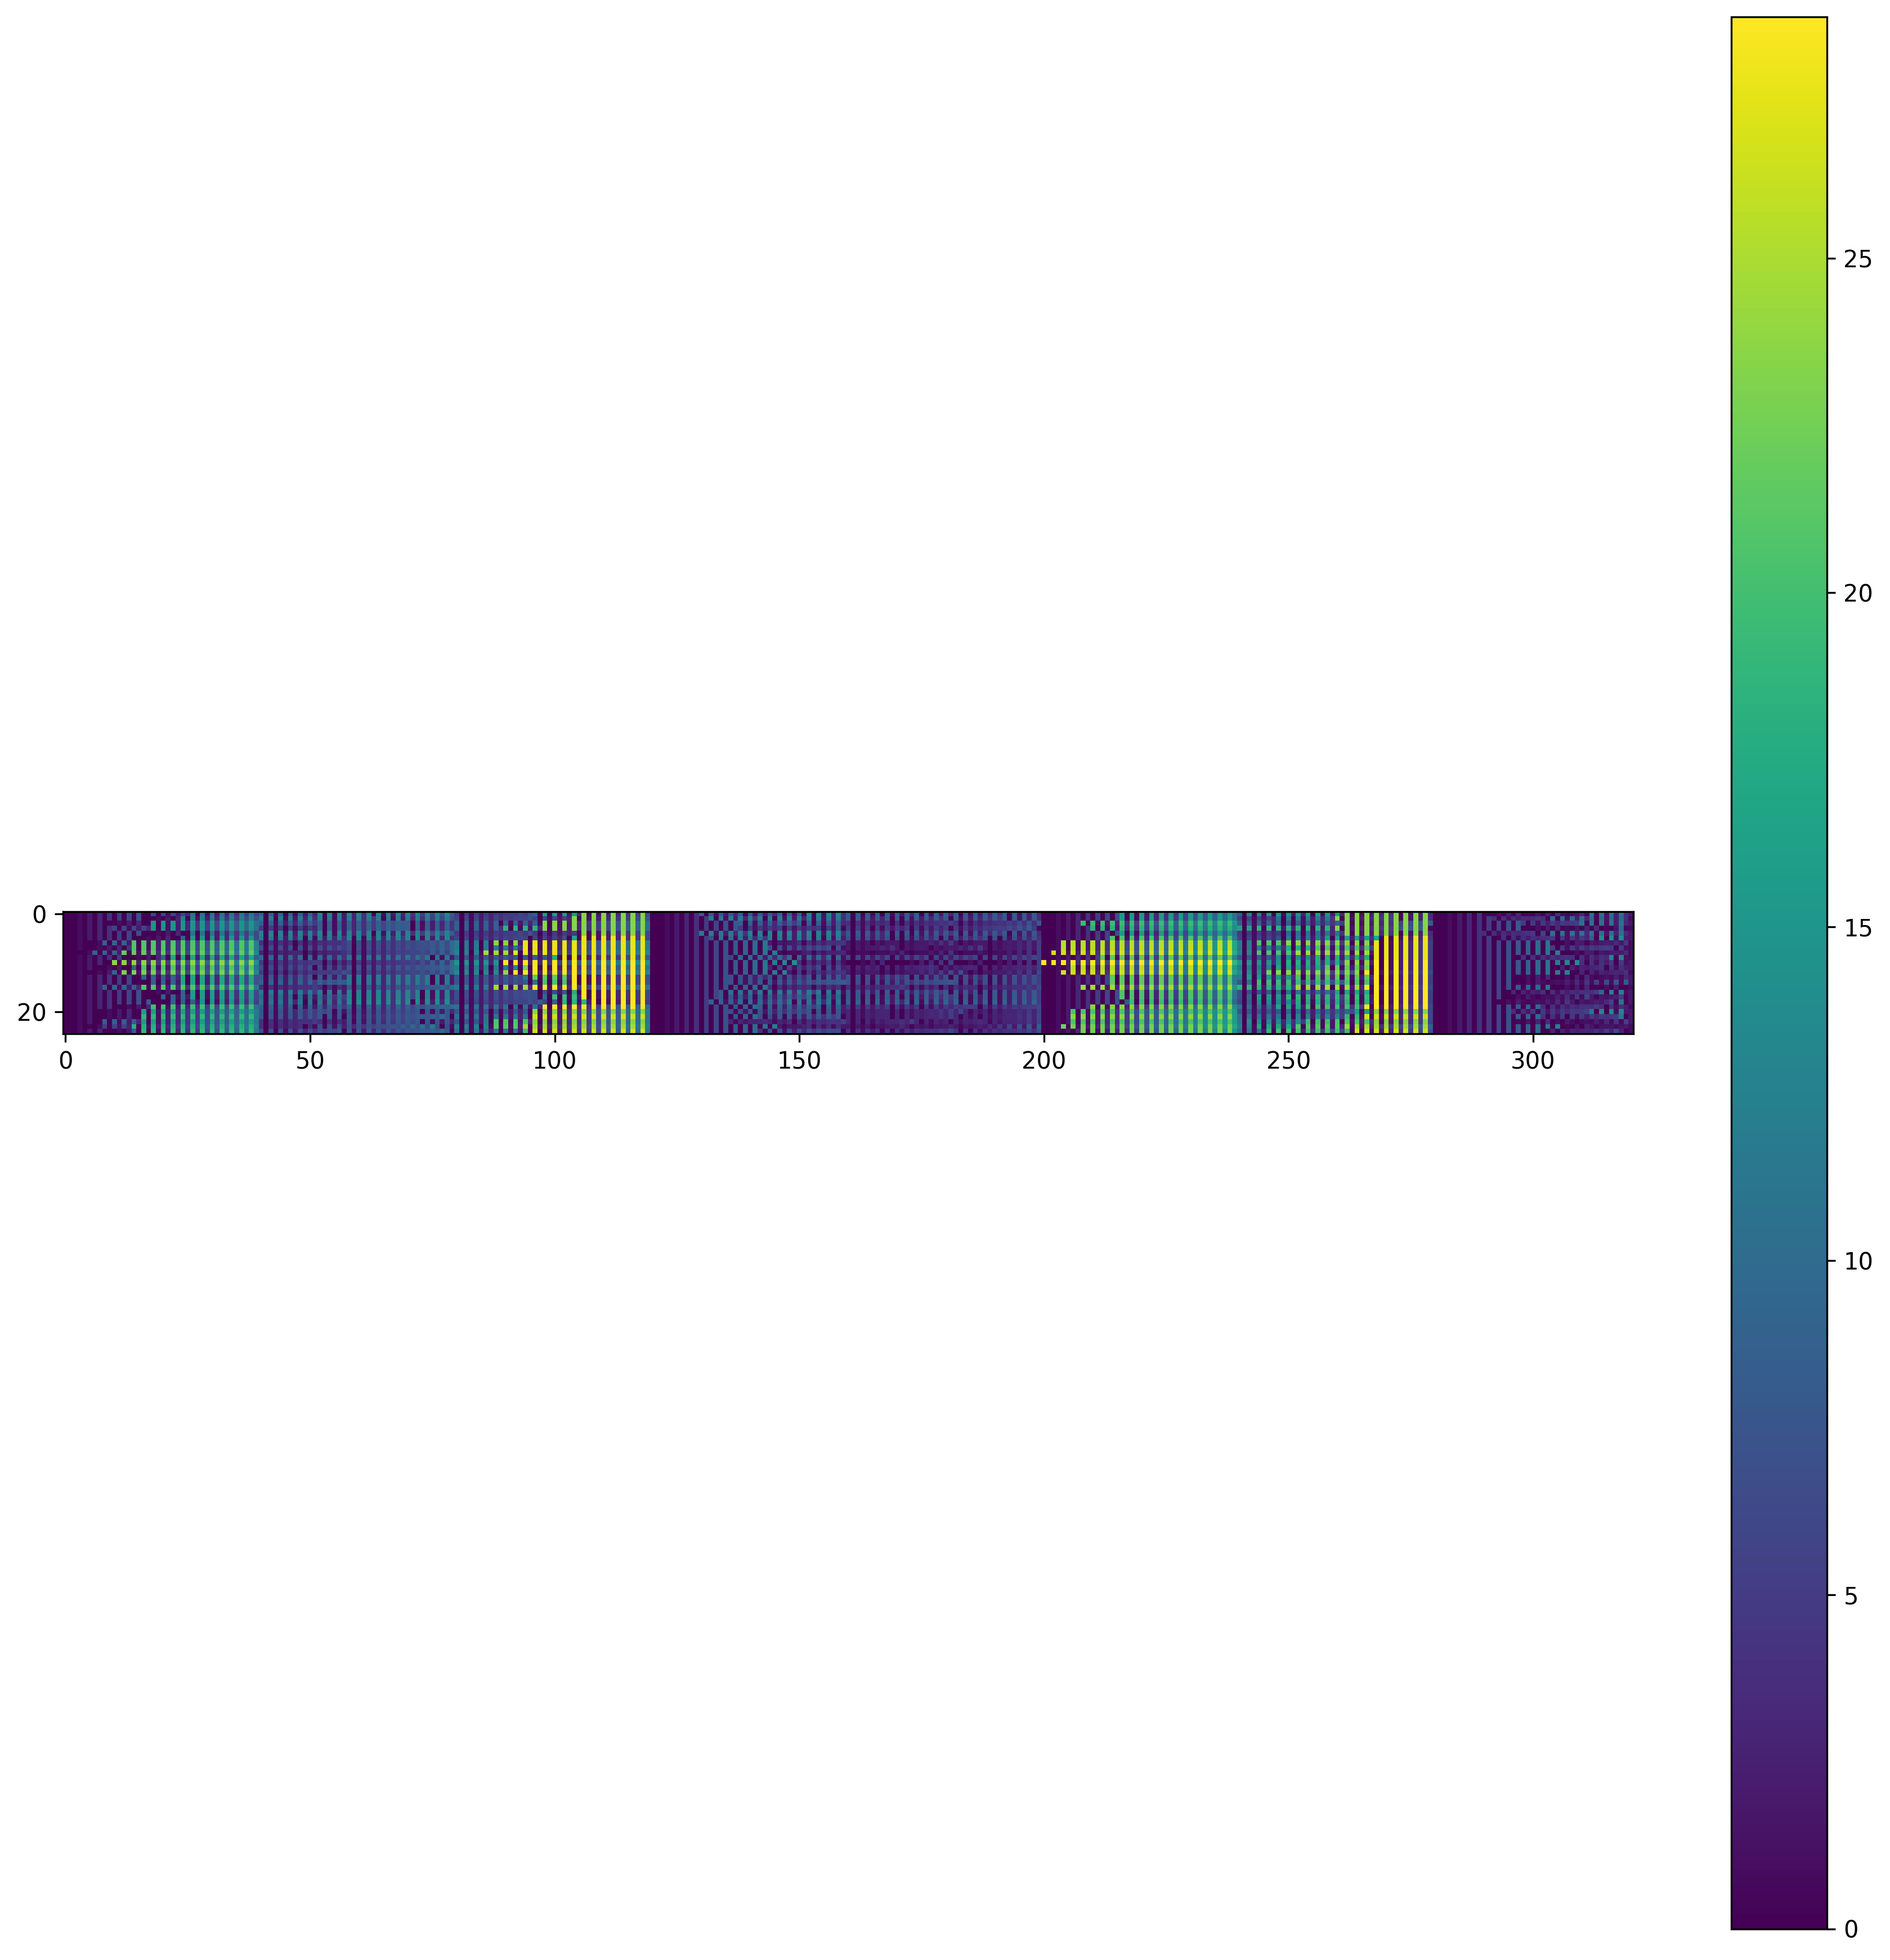

In [17]:
figure(num=None, figsize=(15, 15), dpi=300, facecolor='w', edgecolor='k')
plt.imshow(train_data)
plt.colorbar()
plt.show()